# Jobsheet 02 - Regression

Isikan identitas berikut
NIM: 2241727036
Nama: Rio Raihan Despriatama
Kelas: 4-J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [15]:
# import package
import numpy as np
import pandas as pd

In [24]:
# baca data
data = pd.read_csv('World Population Live Dataset.csv')
data.head()

,CCA3,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,World Population Percentage,Rank
0,CN,China,1425887,1424930,1393715,1348191,1264099,1153704,982372,822534,9706961,146.8933,1.00,17.88%,1
1,IN,India,1417173,1396387,1322867,1240614,1059634,870452,696828,557501,3287590,431.0675,1.01,17.77%,2
2,US,United States,338290,335942,324608,311183,282399,248084,223140,200328,9372610,36.0935,1.00,4.24%,3
3,ID,Indonesia,275501,271858,259092,244016,214072,182160,148177,115228,1904569,144.6529,1.01,3.45%,4
4,PK,Pakistan,235825,227197,210969,194454,154370,115414,80624,59291,881912,267.4018,1.02,2.96%,5


In [25]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CCA3                         233 non-null    object 
 1   Name                         234 non-null    object 
 2   2022                         234 non-null    int64  
 3   2020                         234 non-null    int64  
 4   2015                         234 non-null    int64  
 5   2010                         234 non-null    int64  
 6   2000                         234 non-null    int64  
 7   1990                         234 non-null    int64  
 8   1980                         234 non-null    int64  
 9   1970                         234 non-null    int64  
 10  Area (km²)                   234 non-null    int64  
 11  Density (per km²)            234 non-null    float64
 12  GrowthRate                   234 non-null    float64
 13  World Population Per

,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),GrowthRate,Rank
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,2.340000e+02,234.000000,234.000000,234.000000
mean,3.407441e+04,3.350109e+04,3.172995e+04,2.984523e+04,2.626947e+04,2.271024e+04,18984.645299,15786.876068,5.814494e+05,452.127044,1.009829,117.500000
std,1.367664e+05,1.355899e+05,1.304050e+05,1.242185e+05,1.116982e+05,9.783216e+04,81785.136077,67795.064322,1.761841e+06,2066.121904,0.013772,67.694165
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,0.026100,0.910000,1.000000
25%,4.197500e+02,4.150000e+02,4.045000e+02,3.930000e+02,3.272500e+02,2.642500e+02,229.500000,155.750000,2.650000e+03,38.417875,1.000000,59.250000
50%,5.560000e+03,5.493000e+03,5.307000e+03,4.943000e+03,4.293000e+03,3.825500e+03,3141.000000,2604.500000,8.119950e+04,95.346750,1.010000,117.500000
75%,2.247675e+04,2.144825e+04,1.973075e+04,1.915950e+04,1.576225e+04,1.186950e+04,9826.000000,8817.500000,4.304258e+05,238.933250,1.020000,175.750000
max,1.425887e+06,1.424930e+06,1.393715e+06,1.348191e+06,1.264099e+06,1.153704e+06,982372.000000,822534.000000,1.709824e+07,23172.266700,1.070000,234.000000


### Visualisasi Data

In [26]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

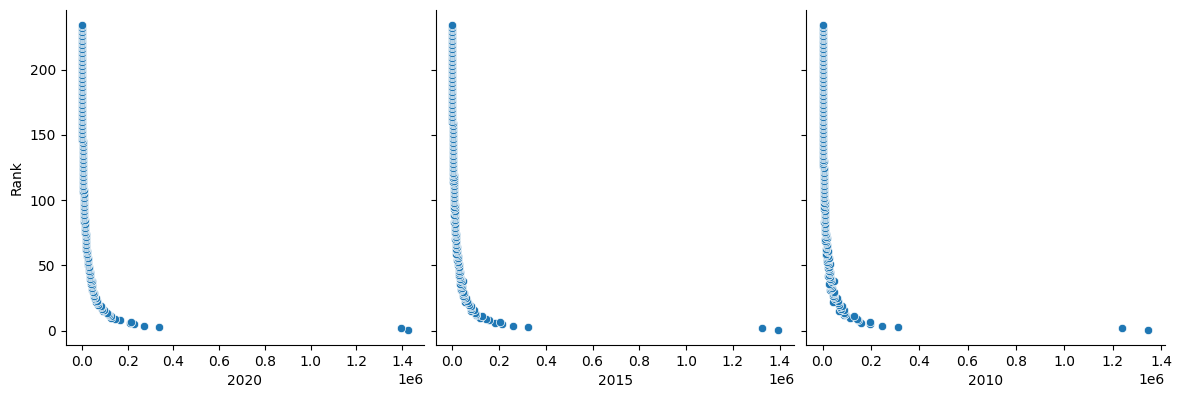

In [27]:
# operasi visualisasi
sns.pairplot(data, x_vars=['2020', '2015','2010'], 
             y_vars='Rank', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

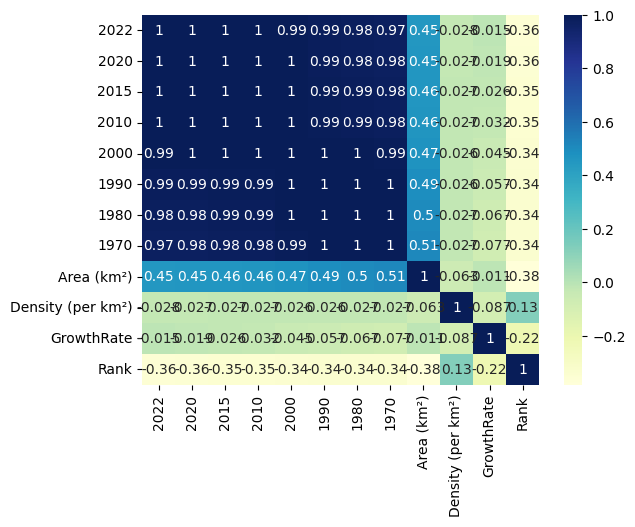

In [28]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [30]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['2020']
y = data['Rank']

In [31]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [32]:
# hasil training dtaset
X_train
y_train

189    190
7        8
28      29
140    141
124    125
      ... 
87      88
103    104
67      68
24      25
8        9
Name: Rank, Length: 163, dtype: int64

In [33]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [34]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    122.059122
2020      -0.000153
dtype: float64

In [35]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     24.63
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.76e-06
Time:                        20:06:56   Log-Likelihood:                -905.42
No. Observations:                 163   AIC:                             1815.
Df Residuals:                     161   BIC:                             1821.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.0591      5.078     24.035      0.000     112.030     132.088
2020          -0.0002   3.09e-05     -4.962      0.000      -0.000   -9.22e-05
==============================================================================
Omnibus:                       84.964   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.896
Skew:                           0.136   Prob(JB):                      0.00431
Kurtosis:                       1.763   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

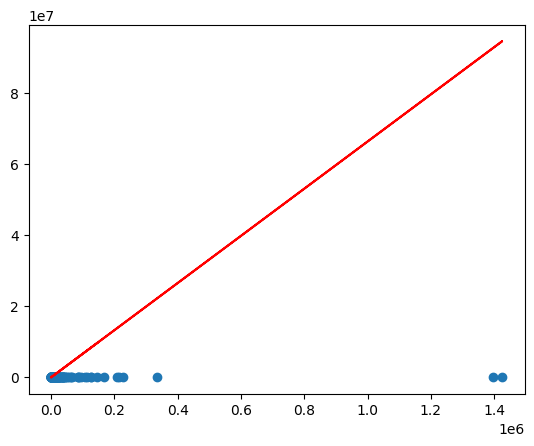

In [36]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [37]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7976\576177224.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


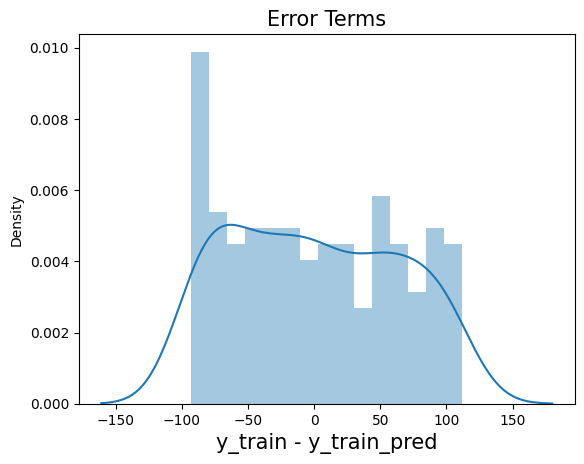

In [38]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

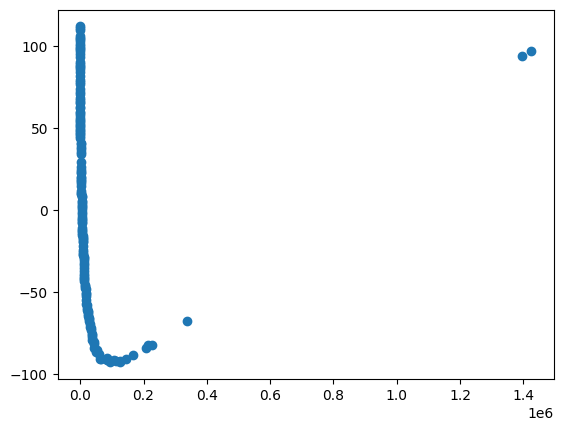

In [39]:
plt.scatter(X_train,res)
plt.show()

In [40]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

178    122.002924
228    122.058204
202    122.047178
152    121.826672
48     117.564924
dtype: float64

In [41]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.10199376598874133

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.273 sedangkan dari data testing adalah 0.200. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

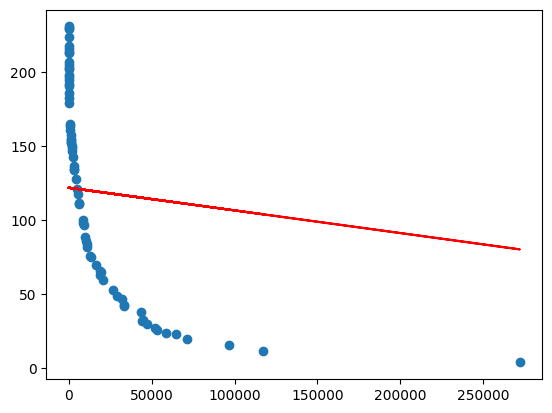

In [42]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()